# Исследование данных интернет-магазина компьютерных игр «Стримчик».

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**План исследования данных интернет-магазина компьютерных игр «Стримчик»:**

1) Загрузить данные из таблицы 'games.csv' и изучить общую информацию.

2) Выполнить предобработку данных каждого датафрейма (изменить названия столбцов, привести тип данных в порядок, обработать пропуски, выявить явные и неявные дубликаты и обработать их, найти и устранить редкие и выбивающиеся значения и аномалии, где это возможно).

3) Провести исследовательский анализ данных.

4) Составить портрет пользователя каждого региона: NA, EU, JP.

5) Проверить гипотезы.

6) Написать промежуточные и общий вывод по результатам исследования.


**Описание данных:**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

*Данные за 2016 год могут быть неполными.*

#### Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv', sep=',')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv', sep=',')


**Вывод общей информации о датафрейме**

In [3]:
data.info()
display(data)
print(data['Year_of_Release'].min(), data['Year_of_Release'].max())
print(len(data['Name'].unique()))
print(len(data['Genre'].unique()))
print(len(data['Platform'].unique()))
print(data['Rating'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


1980.0 2016.0
11560
13
31
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


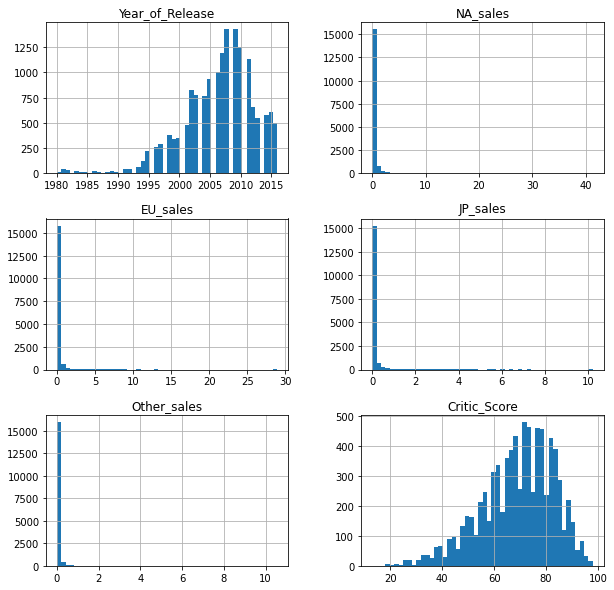

In [4]:
data.hist(figsize=(10, 10), bins=50);

- В датафрейме 16715 строк с данными об компьютерных играх, пропущенные значения есть в столбцах 'Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score', 'Rating'.
- Всего 11560 уникальных названий игр в 13 жанрах и в 8-ми возрастных группах.
- Данные по играм представлены с 1980 по 2016 гг для 31 платформы.
- Они оценивались по 8 рейтингам.

#### Шаг 2. Предобработка данных

**2.1. Заменим названия столбцов (приведем к нижнему регистру).**

In [5]:
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**2.2. Преобразуем данные в нужные типы.**

**Для начала удалим строки где есть пустые значения в столбцах 'name', 'year_of_release', 'genre', так как их незначительное количество.**

In [6]:
data = data.dropna(subset=['name']).reset_index(drop=True)
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**В столбце 'user_score' есть значение 'tbd', которое, скорее всего, обозначает To Be Determined (будет определено), заменим его на значение NAN, тогда и тип данных будет float.**

In [7]:
print(len(data[data['user_score'] == 'tbd']))
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data.info()


2376
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


**Переведем тип данных в столбце 'year_of_release' в 'int'*

In [8]:
data['year_of_release'] = data['year_of_release'].astype('int')

**2.3. Обработка пропусков**

In [9]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

**Для начала определим и удалим явные дубликаты, если таковые есть.**

In [10]:
data.duplicated().sum()

0

**Таких дубликатов нет.**

**Для исключения влияния разного регистра букв на наличие неявных дубликатов приведем строковые данные к нижнему регистру (столбцы 'name', 'platform', 'genre' и 'rating').**

In [11]:
for column in ["name", "platform", "genre", "rating"]:
    data[column] = data[column].str.lower()

In [12]:
#Для дальнейшего поиска неявных дубликатов уберем ограничение количества выводимых строк
# pd.set_option('display.max_rows', None)
data.groupby('name').agg({'name': ['count']})

,name
,count
name,
beyblade burst,1
fire emblem fates,1
frozen: olaf's quest,2
haikyu!! cross team match!,1
tales of xillia 2,1
...,...
zumba fitness rush,1
zumba fitness: world party,2


**В целом неявных дубликатов в названиях игр не наблюдается**

In [13]:
data.groupby('platform').agg({'platform': ['count']})

,platform
,count
platform,
2600,116
3do,3
3ds,512
dc,52
ds,2121
gb,97
gba,811
gc,542


**По названиям платформ неявных дубликатов не отмечается**

In [14]:
data['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

**По жанрам также нет дубликатов.**

In [15]:
data['rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

**По возрастному рейтингу также дубликатов не обнаружено**

In [16]:
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release']).reset_index(drop=True)

**Выявлен дубликат по столбцам 'name', 'platform', 'year_of_release', удалим его.**

**Заполним пропуски в столбце c возрастным ограничением 'rating'**

In [17]:
display(data.groupby('name')['rating'].agg({lambda s: s.isna().sum(), lambda g: g.count()}).head(40))
display(data[data['name'] == '007: The World is not Enough'])

,<lambda_0>,<lambda_1>
name,,
beyblade burst,0,1
fire emblem fates,0,1
frozen: olaf's quest,0,2
haikyu!! cross team match!,0,1
tales of xillia 2,1,0
'98 koshien,0,1
.hack//g.u. vol.1//rebirth,0,1
.hack//g.u. vol.2//reminisce,0,1
.hack//g.u. vol.2//reminisce (jp sales),0,1


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


**Видно, что есть игры, у которых на определенных платформах нет возрастного ограничения. Очевидно, что на всех платформах будет одинаковое возрастное ограничение. Заполним пропущенные значения в столбце 'rating' по одной и той же игре с той платформы, где рейтинг есть.**

In [18]:
nan_rating_list = data[data['rating'].isna()]
for t in nan_rating_list['name'].unique():
    try:
        data.loc[(data['name'] == t) & (data['rating'].isna()), 'rating'] = \
        data.loc[(data['name'] == t), 'rating'].dropna().unique()[0]
    except:
        pass

In [19]:
display(data['rating'].isna().sum())
data['rating'].unique()

6259

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

**Остальные пропуски заменим на слово 'nan', чтобы в дальнейшем было удобно визуализировать данные.**

In [20]:
data['rating'] = data['rating'].fillna('nan')
data['rating'].unique()

array(['e', 'nan', 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'],
      dtype=object)

In [21]:
data.groupby('rating').agg({'rating': ['count']})

,rating
,count
rating,
ao,1
e,4074
e10+,1441
ec,10
k-a,4
m,1621
nan,6259
rp,1


**Возрастное ограничение 'K-A' (Kids to Adults) это тоже самое, что и 'E' (Everyone), поэтому заменим 'K-A' (Kids to Adults) на 'E' (Everyone). Также заменим 'A-O' (Adults Only 18+) на похожее 'M' (Mature), а 'RP' (Rating Pending), на 'NAN'.**

In [22]:
data['rating'] = data['rating'].replace('k-a', 'e')
data['rating'] = data['rating'].replace('ao', 'm')
data['rating'] = data['rating'].replace('rp', 'nan')

data.groupby('rating').agg({'rating': ['count']})

,rating
,count
rating,
e,4078
e10+,1441
ec,10
m,1622
nan,6260
t,3032


**2.4. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.**

In [23]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


**В результате предобработки данных выполнено следующее:**
 - Заменены названия столбцов (приведены к нижнему регистру).
 - Удалены строки где есть пустые значения в столбцах 'name', 'year_of_release', 'genre', так как их незначительное количество.
 - Переведен тип данных в столбце 'year_of_release' в 'int'.
 - В столбце 'user_score' есть значение 'tbd', которое, скорее всего, обозначает To Be Determined (будет определено), оно заменено на значение NaN, a тип данных переведен во float.
 - Выявлен и удален дубликат по столбцам 'name', 'platform', 'year_of_release'.
 - Видно, что есть игры, у которых на определенных платформах нет возрастного ограничения. Очевидно, что на всех платформах будет одинаковое возрастное ограничение. Заполнены пропущенные значения в столбце 'rating' по одной и той же игре с той платформы, где рейтинг есть. Остальные пропуски заменены на слово 'nan', чтобы в дальнейшем было удобно визуализировать данные.
 - Возрастное ограничение 'K-A' (Kids to Adults) это тоже самое, что и 'E' (Everyone), поэтому 'K-A' (Kids to Adults) заменено на 'E' (Everyone). Также заменено 'A-O' (Adults Only 18+) на похожее 'M' (Mature), а 'RP' (Rating Pending), на 'NAN'.
 - Подсчитаны суммарные продажи во всех регионах и записаны в отдельный столбец 'total_sales'.

#### Шаг 3. Исследовательский анализ данных

**3.1. Посмотрим, сколько игр выпускалось в разные годы.**

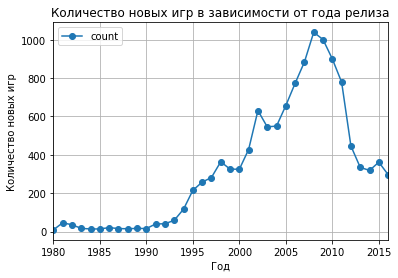

In [24]:
data1 = data.groupby('year_of_release').agg({'name': ['nunique']}).reset_index(drop=False)
data1.columns = ['year_of_release', 'count']
data1.plot(x='year_of_release', y='count', style='o-', xlim=(1980, 2016), grid=True)
plt.xlabel('Год')
plt.ylabel('Количество новых игр')
plt.title("Количество новых игр в зависимости от года релиза")
plt.show()

**До 2008-2009 гг. количество выпущенных новых игр росло, далее произошло значительное падение до 2013 года и дальше выпуск игр стабилизировался. Вероятно данные до стабилизации (до 2013 года) будут не актуальны для анализа.**

**3.2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

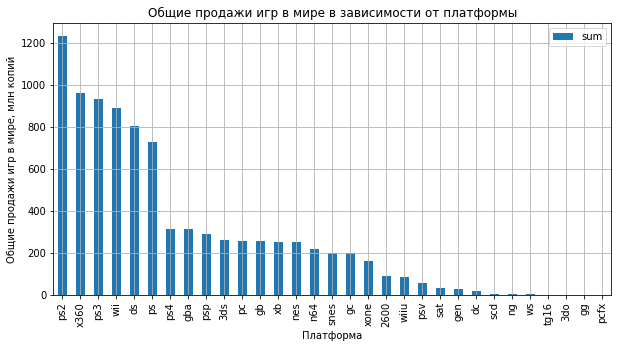

In [25]:
data.groupby('platform').agg({'total_sales': ['sum']})['total_sales'] \
.sort_values(by='sum', ascending=False).plot(y='sum', kind='bar', figsize=(10, 5), grid=True)
plt.xlabel('Платформа')
plt.ylabel('Общие продажи игр в мире, млн копий')
plt.title("Общие продажи игр в мире в зависимости от платформы")
plt.show()

In [26]:
data_platform = data.groupby('platform').agg({'total_sales': ['sum']})['total_sales'] \
.sort_values(by='sum', ascending=False).query('sum > 700')
data_platform

,sum
platform,
ps2,1233.56
x360,961.24
ps3,931.33
wii,891.18
ds,802.78
ps,727.58


**Явно выделяется топ-6 платформ: 'PS2', 'X360', 'PS3', 'Wii', 'DS' и 'PS', у которых сумарные продажи изменяются, от 728 до 1234 млн. копий игр.**

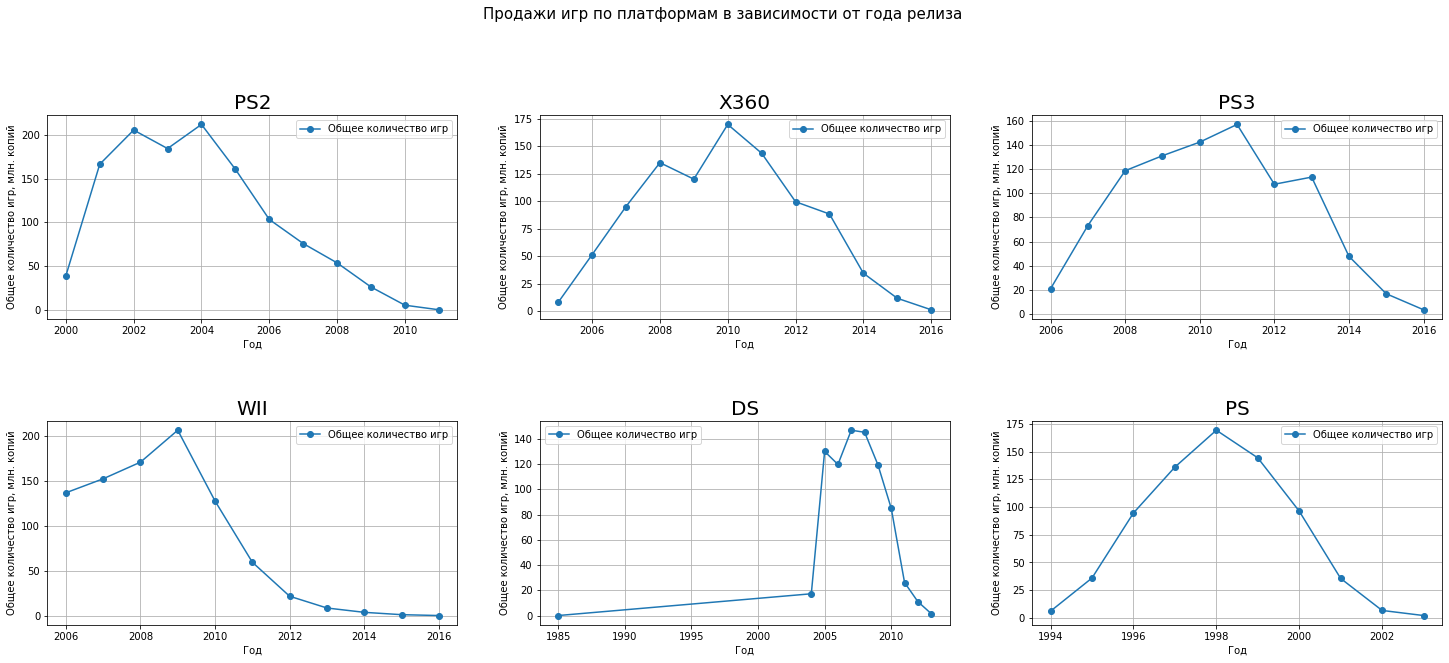

In [28]:
position = 0
platform_name = data_platform.reset_index()['platform'].unique()
plt.figure(figsize=[25, 15])
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Продажи игр по платформам в зависимости от года релиза', fontsize=15)
for name in platform_name:
    position += 1
    grouped = data.query('platform == @name').groupby('year_of_release').agg({'total_sales': ['sum']})
    plt.subplot(3, 3, position)
    plt.title(name.upper(), fontsize=20)
    plt.plot(grouped, 'o-', label='Общее количество игр', alpha=1)
    plt.ylabel('Общее количество игр, млн. копий')
    plt.xlabel('Год')
    plt.grid(True)
    plt.legend()
plt.show();

**Можно сказать, что характерный срок "жизни" платформы составляет в среднем 10 лет.**

**3.3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.**

**3.4. Актуальным периодом будем считать 4 года с 2013 по 2016 гг. Данные за предыдущие года учитывать не будем.**

In [29]:
actual_data = data.query('year_of_release > 2012')
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


**3.5. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

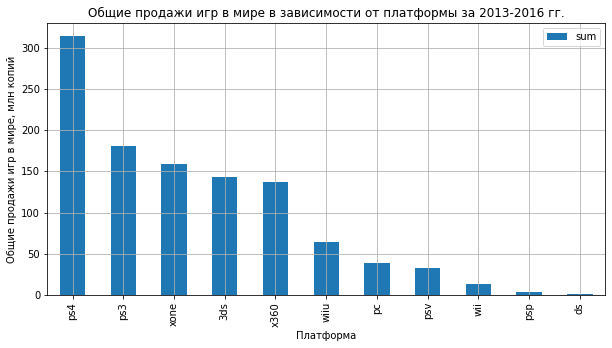

In [30]:
actual_data.groupby('platform').agg({'total_sales': ['sum']})['total_sales'] \
.sort_values(by='sum', ascending=False).plot(y='sum', kind='bar', figsize=(10, 5), grid=True)
plt.xlabel('Платформа')
plt.ylabel('Общие продажи игр в мире, млн копий')
plt.title("Общие продажи игр в мире в зависимости от платформы за 2013-2016 гг.")
plt.show()

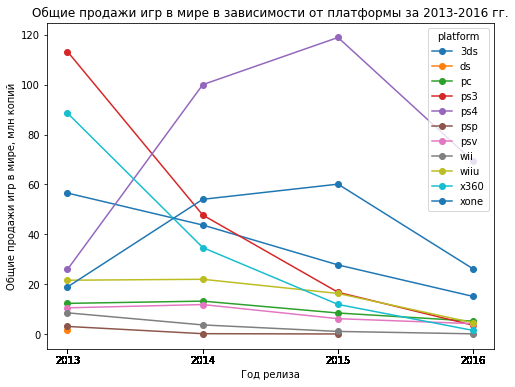

platform,3ds,ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [31]:
actual_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum') \
.plot(grid=False, style='o-', figsize=(8, 6))

plt.xticks(actual_data['year_of_release'])

plt.xlabel('Год релиза')
plt.ylabel('Общие продажи игр в мире, млн копий')
plt.title("Общие продажи игр в мире в зависимости от платформы за 2013-2016 гг.")
plt.show()
actual_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

**Лидирующие платформы по общим продажам следующие: 'PS4', 'PS3', 'X360', 'XOne', '3DS'. С 2013 по 2016 гг. продажи игр для платформ 'PS4' и 'XOne' в среднем растут (за 2016 год данные не полные), для платформ 'PS3', 'X360' и '3DS' - падают. Наиболее потенциально прибыльными являются 'PS4' и 'XOne'.**

**3.6. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

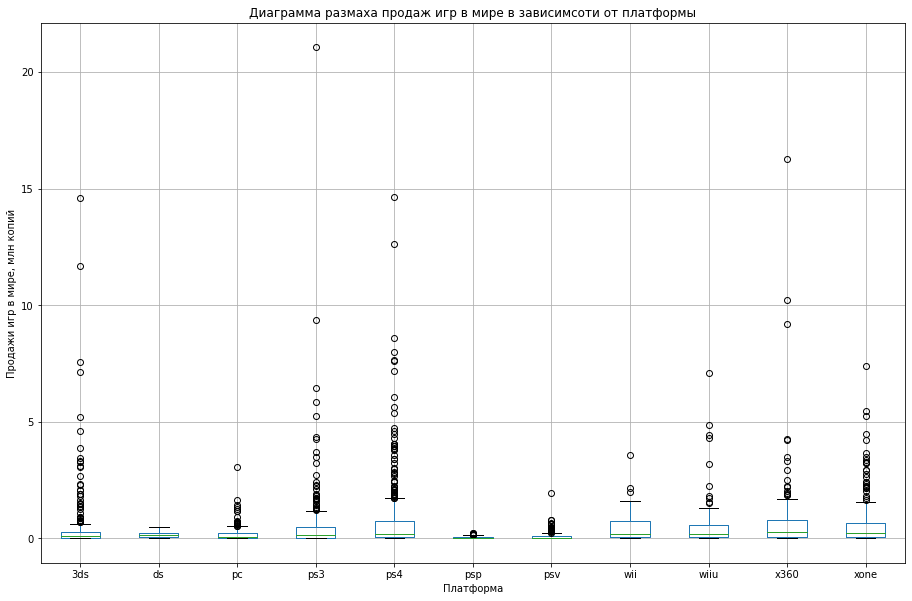

In [32]:
actual_data.boxplot(column=['total_sales'], by='platform', figsize=(15, 10)) 

# plt.ylim(0, 1)
plt.xlabel('Платформа')
plt.ylabel('Продажи игр в мире, млн копий')
plt.title("Диаграмма размаха продаж игр в мире в зависимсоти от платформы")
plt.suptitle('')

plt.show()

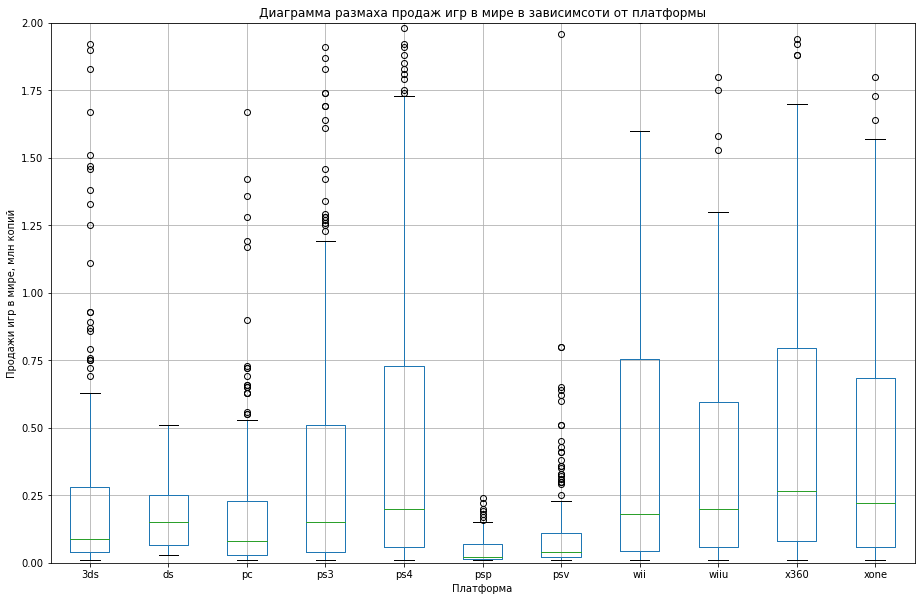

In [33]:
actual_data.boxplot(column=['total_sales'], by='platform', figsize=(15, 10)) 

plt.ylim(0, 2)
plt.xlabel('Платформа')
plt.ylabel('Продажи игр в мире, млн копий')
plt.title("Диаграмма размаха продаж игр в мире в зависимсоти от платформы")
plt.suptitle('')

plt.show()

**Достаточно много выбросов в продажах игр почти для каждой платформы. Расперделения значений похоже на распределение Пуассона. Медианы количества продаж игр по платформам варьируются примерно от 0,01 до 0,25 млн. копий.**

**3.7. Посмотрим, как влияют на продажи внутри одной популярной платформы (возьмем 'PS4') отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**

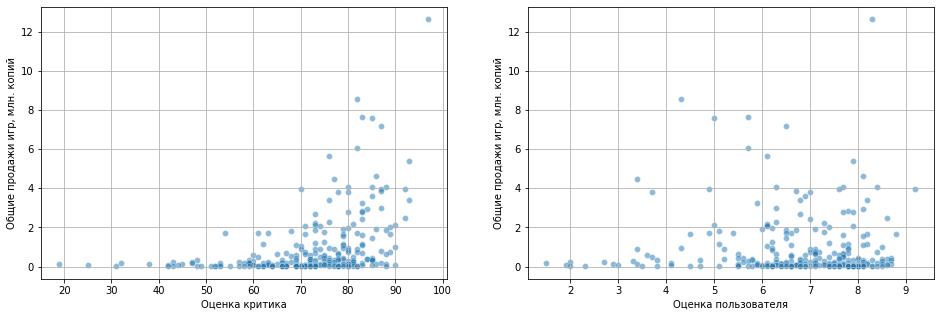

In [34]:
actual_data_ps4 = actual_data.query('platform == "ps4"')

plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='total_sales', data=actual_data_ps4, alpha=0.5)
plt.ylabel('Общие продажи игр, млн. копий')
plt.xlabel('Оценка критика')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=actual_data_ps4, alpha=0.5)
plt.ylabel('Общие продажи игр, млн. копий')
plt.xlabel('Оценка пользователя')
plt.grid(True)

In [35]:
print('Коэффициент корреляции зависимости общих продаж игр и оценки критиков - ', actual_data_ps4['critic_score'].corr(actual_data_ps4['total_sales']).round(2))
print('Коэффициент корреляции зависимости общих продаж игр и оценки пользователей - ', actual_data_ps4['user_score'].corr(actual_data_ps4['total_sales']).round(2))

Коэффициент корреляции зависимости общих продаж игр и оценки критиков -  0.41
Коэффициент корреляции зависимости общих продаж игр и оценки пользователей -  -0.03


**В результате построения диаграмм рассеяния корреляции между количеством проданных копий игр и оценками критиков и пользователей являются слабыми для платформы 'PS4', однако оценка критиков оказывает большее влияние на продажи игр, когда оценка пользователей практически не влияет на них.**

**3.8. Соотнесем данный вывод с продажами игр на других платформах.**

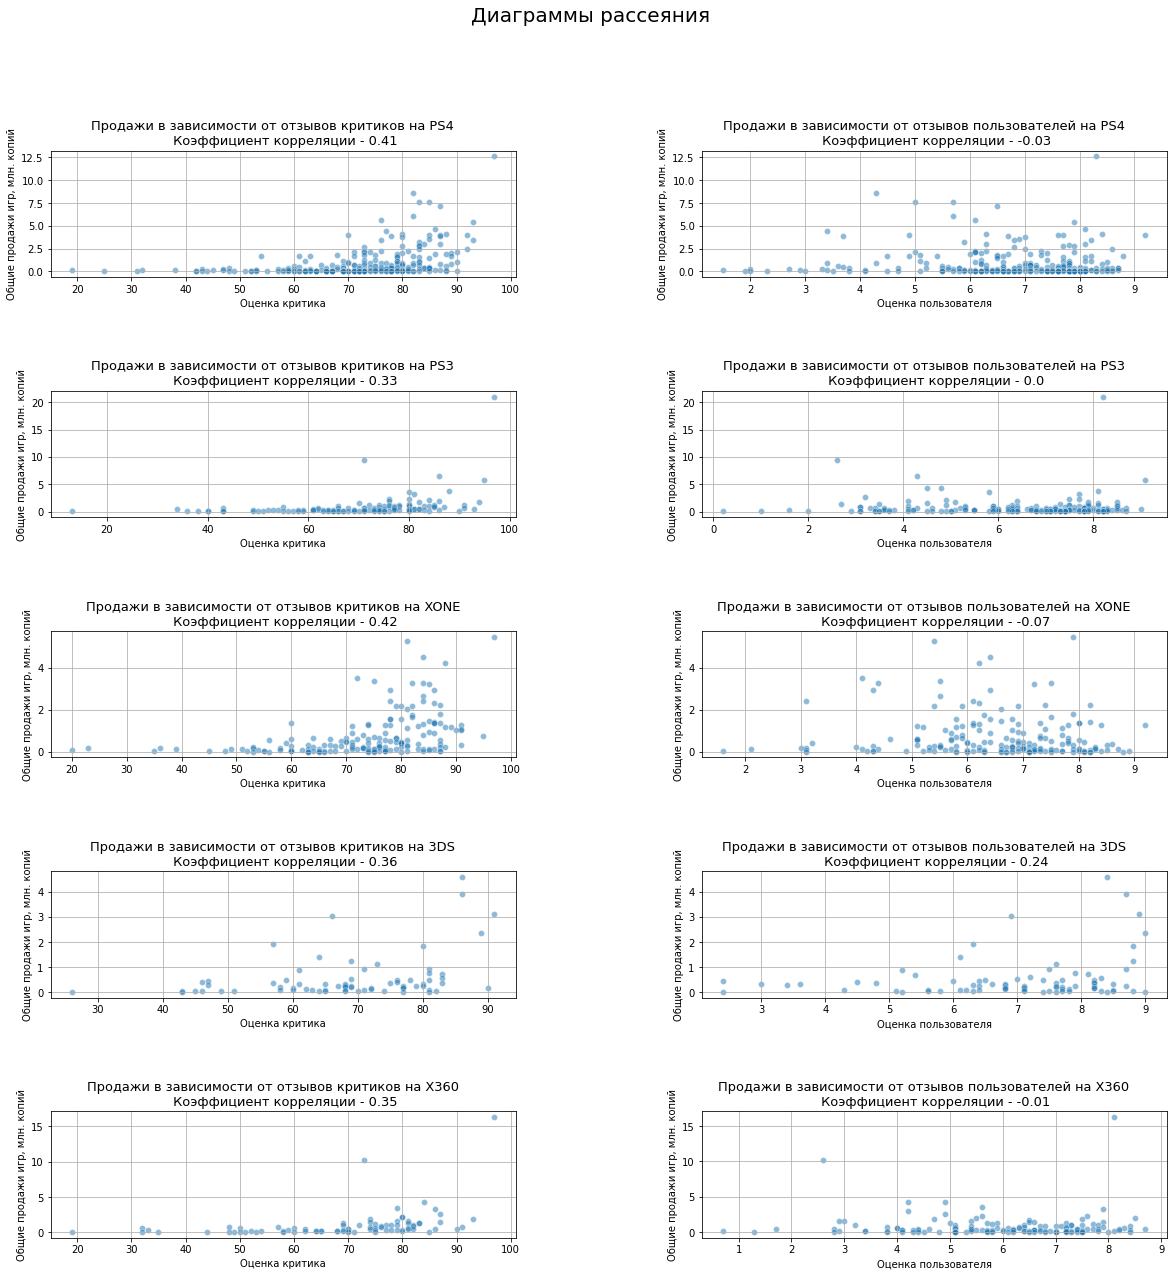

In [36]:
platform_name_2013_2016 = actual_data.groupby('platform').agg({'total_sales': ['sum']})['total_sales'] \
.sort_values(by='sum', ascending=False).head(5).reset_index()['platform'].unique()

position = 0
plt.figure(figsize=[20, 20])
plt.subplots_adjust(wspace=0.4, hspace=0.9)
plt.suptitle('Диаграммы рассеяния', fontsize=20)
for name in platform_name_2013_2016:
    position += 1
    platform_data_2013_2016 = actual_data[actual_data['platform'] == name]
    
    plt.subplot(5, 2, position)
    critic_corr = platform_data_2013_2016['critic_score'].corr(platform_data_2013_2016['total_sales'])
    plt.title(f'Продажи в зависимости от отзывов критиков на {name.upper()} \
    \n Коэффициент корреляции - {critic_corr.round(2)}', fontsize=13)
    sns.scatterplot(x='critic_score', y='total_sales', data=platform_data_2013_2016, alpha=0.5)
    plt.ylabel('Общие продажи игр, млн. копий')
    plt.xlabel('Оценка критика')
    plt.grid(True)

    position += 1
    plt.subplot(5, 2, position)
    user_corr = platform_data_2013_2016['user_score'].corr(platform_data_2013_2016['total_sales'])
    plt.title(f'Продажи в зависимости от отзывов пользователей на {name.upper()} \
    \n Коэффициент корреляции - {user_corr.round(2)}', fontsize=13)
    sns.scatterplot(x='user_score', y='total_sales', data=platform_data_2013_2016, alpha=0.5)
    plt.ylabel('Общие продажи игр, млн. копий')
    plt.xlabel('Оценка пользователя')
    plt.grid(True)

**Коэффициенты корреляции зависимостей продаж игр от отзывов критиков для платформ 'PS4' и 'XONE' одинаковы, у остальных платформ коэффициенты корреляции меньше. Коэффициенты корреляции зависимостей продаж игр от пользователей для платформ 'PS4' и остальных незначительные, кроме коэффициента корреляции для платформы '3DS', который равен 0.24. В целом для прогнозирования продаж игр популярных платформ можно учитывать влияние оценки критиков на продажи, а оценки пользователей можно не брать во внимание.**

**3.9. Посмотрим на общее распределение игр по жанрам.**

name total_sales                 
             count         sum      mean median
genre                                          
action         766      321.87  0.420196  0.110
adventure      245       23.64  0.096490  0.030
fighting        80       35.31  0.441375  0.125
misc           155       62.82  0.405290  0.100
platform        74       42.63  0.576081  0.225
puzzle          17        3.17  0.186471  0.060
racing          85       39.89  0.469294  0.120
role-playing   292      145.89  0.499623  0.125
shooter        187      232.98  1.245882  0.450
simulation      62       21.76  0.350968  0.100
sports         214      150.65  0.703972  0.240
strategy        56       10.08  0.180000  0.080

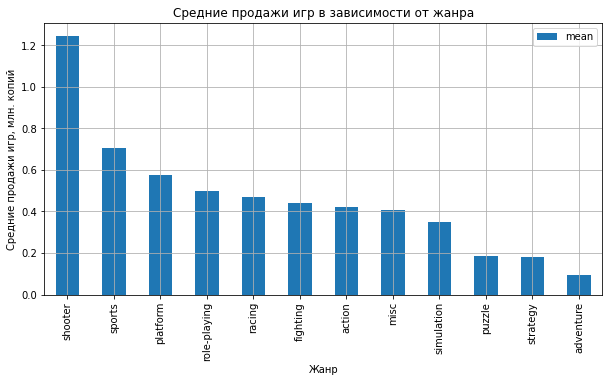

In [37]:
display(actual_data.groupby('genre').agg({'name': ['count'],'total_sales': ['sum', 'mean', 'median']}))

actual_data.groupby('genre').agg({'total_sales': ['mean']})['total_sales'] \
.sort_values(by='mean', ascending=False).plot(y='mean', kind='bar', figsize=(10, 5), grid=True)
plt.title("Средние продажи игр в зависимости от жанра")
plt.ylabel('Средние продажи игр, млн. копий')
plt.xlabel('Жанр');

**Наибольшее количество игр и суммарное количество продаж в жанре Action. Наименьшее количество игр и суммарное количество продаж в жанре Puzzle. Наибольшее среднее и медианное количество продаж игр жанра Shooter. Наименьшее среднее и медианное количество продаж игр жанра Adventure. В результате, наиболее прибыльным жанром является 'Shooter', наи менее прибыльным - Adventure.**

**Проведен исследовательский анализ данных:**

- До 2008-2009 гг. количество выпущенных новых игр росло, далее произошло значительное падение до 2013 года и дальше выпуск игр стабилизировался. Вероятно данные до стабилизации (до 2013 года) будут не актуальны для анализа.
- Явно выделяется топ-6 платформ по количеству продаж: 'PS2', 'X360', 'PS3', 'Wii', 'DS' и 'PS', у которых сумарные продажи изменяются, от 728 до 1234 млн. копий игр. Можно сказать, что характерный срок "жизни" платформы составляет в среднем 10 лет.
- Актуальным периодом будем считать 4 года с 2013 по 2016 гг. Данные за предыдущие года учитывать не будем.
- Лидирующие платформы по общим продажам следующие: 'PS4', 'PS3', 'X360', 'XOne', '3DS'. С 2013 по 2016 гг. продажи игр для платформ 'PS4' и 'XOne' в среднем растут (за 2016 год данные не полные), для платформ 'PS3', 'X360' и '3DS' - падают. Наиболее потенциально прибыльными являются 'PS4' и 'XOne'.
- При рассмотрении диаграмм размаха выявлено достаточно много выбросов в продажах игр почти для каждой платформы. Расперделения значений похоже на распределение Пуассона. Медианы количества продаж игр по платформам варьируются примерно от 0,01 до 0,25 млн. копий.
- В результате построения диаграмм рассеяния корреляции между количеством проданных копий игр и оценками критиков и пользователей являются слабыми для платформы 'PS4', однако оценка критиков оказывает большее влияние на продажи игр, когда оценка пользователей практически не влияет на них.
- Коэффициенты корреляции зависимостей продаж игр от отзывов критиков для платформ 'PS4' и 'XONE' одинаковы, у остальных платформ коэффициенты корреляции меньше. Коэффициенты корреляции зависимостей продаж игр от пользователей для платформ 'PS4' и остальных незначительные, кроме коэффициента корреляции для платформы '3DS', который равен 0.24. В целом для прогнозирования продаж игр популярных платформ можно учитывать влияние оценки критиков на продажи, а оценки пользователей можно не брать во внимание.
- Наибольшее количество игр и суммарное количество продаж в жанре Action. Наименьшее количество игр и суммарное количество продаж в жанре Puzzle. Наибольшее среднее и медианное количество продаж игр жанра Shooter. Наименьшее среднее и медианное количество продаж игр жанра Adventure. В результате, наиболее прибыльным жанром является 'Shooter', наи менее прибыльным - Adventure.

#### Шаг 4. Составление портрета пользователя каждого региона

**4.1. Определим самые популярные платформы (топ-5) для каждого региона**

In [38]:
actual_data_region = actual_data.pivot_table(index='platform', values=('na_sales', 'eu_sales', 'jp_sales', 'other_sales'), aggfunc='sum')
actual_data_region['%_eu_sales'] = actual_data_region['eu_sales']/actual_data_region['eu_sales'].sum()
actual_data_region['%_jp_sales'] = actual_data_region['jp_sales']/actual_data_region['jp_sales'].sum()
actual_data_region['%_na_sales'] = actual_data_region['na_sales']/actual_data_region['na_sales'].sum()
actual_data_region['%_other_sales'] = actual_data_region['other_sales']/actual_data_region['other_sales'].sum()

display(actual_data_region)

,eu_sales,jp_sales,na_sales,other_sales,%_eu_sales,%_jp_sales,%_na_sales,%_other_sales
platform,,,,,,,,
3ds,30.96,67.81,38.20,6.28,0.078933,0.481674,0.087272,0.052346
ds,0.85,0.00,0.57,0.12,0.002167,0.000000,0.001302,0.001000
pc,25.36,0.00,11.11,2.96,0.064656,0.000000,0.025382,0.024673
ps3,67.81,23.35,63.50,26.77,0.172883,0.165862,0.145073,0.223139
ps4,141.09,15.96,108.74,48.35,0.359712,0.113368,0.248429,0.403017
psp,0.17,3.29,0.00,0.04,0.000433,0.023370,0.000000,0.000333
psv,6.10,18.59,5.04,3.26,0.015552,0.132050,0.011514,0.027173
wii,5.93,0.05,6.56,1.12,0.015119,0.000355,0.014987,0.009336
wiiu,19.85,10.88,29.21,4.69,0.050608,0.077284,0.066734,0.039093


**В Европе наиболее популярными платформами являются 'PS4' (36,0%), 'PS3' (17,3%), 'XOne' (13,2%), 'X360' (10,8%) и '3DS' (7,9%).**

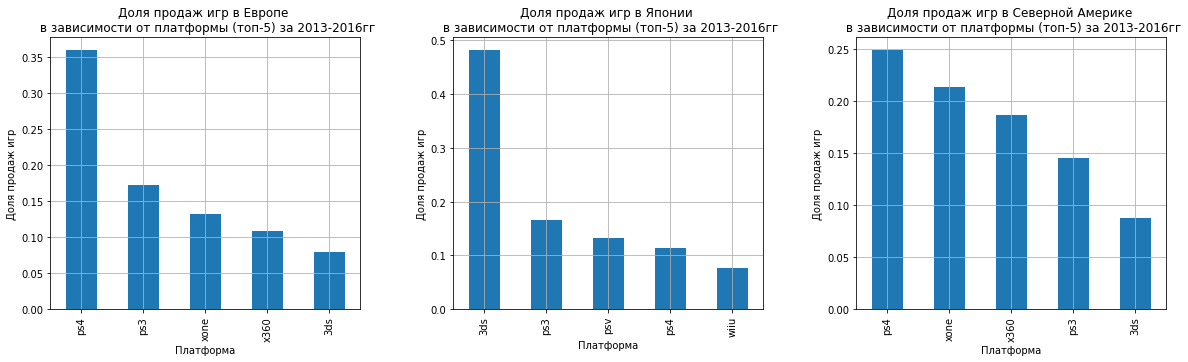

In [39]:

plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(1, 3, 1)
actual_data_region['%_eu_sales'].sort_values(ascending=False).head().plot(y='%_eu_sales', kind='bar', figsize=(20, 5), grid=True)
plt.xlabel('Платформа')
plt.ylabel('Доля продаж игр')
plt.title("Доля продаж игр в Европе \n в зависимости от платформы (топ-5) за 2013-2016гг")

plt.subplot(1, 3, 2)
actual_data_region['%_jp_sales'].sort_values(ascending=False).head().plot(y='%_jp_sales', kind='bar', figsize=(20, 5), grid=True)
plt.xlabel('Платформа')
plt.ylabel('Доля продаж игр')
plt.title("Доля продаж игр в Японии \n в зависимости от платформы (топ-5) за 2013-2016гг")

plt.subplot(1, 3, 3)
actual_data_region['%_na_sales'].sort_values(ascending=False).head().plot(y='%_na_sales', kind='bar', figsize=(20, 5), grid=True)
plt.xlabel('Платформа')
plt.ylabel('Доля продаж игр')
plt.title("Доля продаж игр в Северной Америке \n в зависимости от платформы (топ-5) за 2013-2016гг")
plt.show()

**В Европе наиболее популярными платформами являются 'PS4' (36,0%), 'PS3' (17,3%), 'XOne' (13,2%), 'X360' (10,8%) и '3DS' (7,9%). В Японии наиболее популярными платформами являются '3DS' (48,2%), 'PS3' (16,6%), 'PSV' (13,2%), 'PS4' (11,3%) и 'WiiU' (7,7%). В Северной Америке наиболее популярными платформами являются 'PS4' (24,8%), 'X360' (18,7%), 'XOne' (21,3%), 'PS3' (14,5%) и '3DS' (8,7%).**

**4.2. Определим самые популярные жанры (топ-5) для каждого региона**

,eu_sales,jp_sales,na_sales,other_sales
genre,,,,
action,118.13,40.49,126.05,37.20
adventure,8.25,5.82,7.14,2.43
fighting,8.55,7.65,15.55,3.56
misc,20.04,9.20,27.49,6.09
platform,15.58,4.79,18.14,4.12
puzzle,1.00,1.18,0.83,0.16
racing,20.19,2.30,12.96,4.44
role-playing,36.97,51.04,46.40,11.48
shooter,87.86,6.61,109.74,28.77


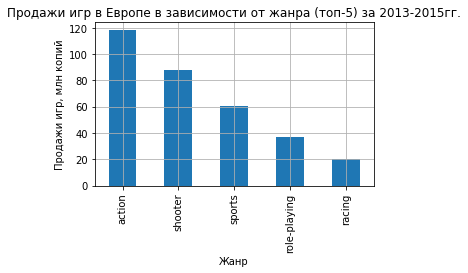

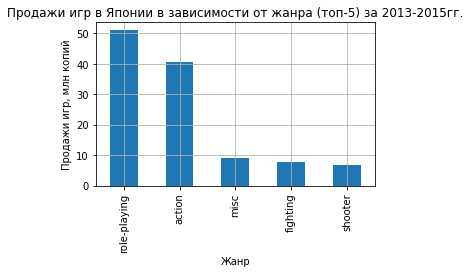

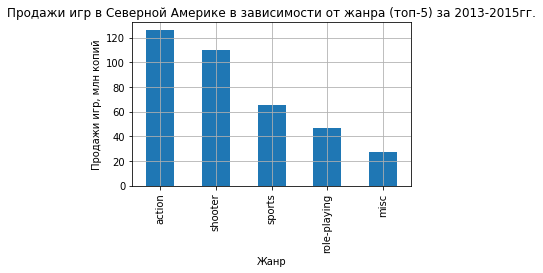

In [40]:
actual_data_genre = actual_data.pivot_table(index='genre', values=('na_sales', 'eu_sales', 'jp_sales', 'other_sales'), aggfunc='sum')
display(actual_data_genre)
actual_data_genre['eu_sales'].sort_values(ascending=False).head().plot(y='eu_sales', kind='bar', figsize=(5, 3), grid=True)
plt.xlabel('Жанр')
plt.ylabel('Продажи игр, млн копий')
plt.title("Продажи игр в Европе в зависимости от жанра (топ-5) за 2013-2015гг.")
plt.show()

actual_data_genre['jp_sales'].sort_values(ascending=False).head().plot(y='jp_sales', kind='bar', figsize=(5, 3), grid=True)
plt.xlabel('Жанр')
plt.ylabel('Продажи игр, млн копий')
plt.title("Продажи игр в Японии в зависимости от жанра (топ-5) за 2013-2015гг.")
plt.show()

actual_data_genre['na_sales'].sort_values(ascending=False).head().plot(y='na_sales', kind='bar', figsize=(5, 3), grid=True)
plt.xlabel('Жанр')
plt.ylabel('Продажи игр, млн копий')
plt.title("Продажи игр в Северной Америке в зависимости от жанра (топ-5) за 2013-2015гг.")
plt.show()

**В Европе наиболее популярными жанрами являются Action, Shooter, Sports, Role-Playing, Racing. В Японии наиболее популярными жанрами являются Role-Playing, Action, Misc, Fightning, Shooter. В Северной Америке наиболее популярными жанрами являются Action, Shooter, Sports, Role-Playing, Misc. Точно так же как и в Европе, что вероятно связано с культурными аспектами данных континентов.**

**4.3. Определим Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
e,85.49,15.98,81.71,23.18
e10+,45.20,6.27,56.38,13.21
m,153.71,14.72,172.82,49.73
nan,64.15,80.97,74.82,18.87
t,43.68,22.84,51.98,14.98


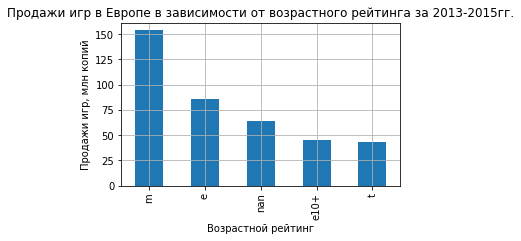

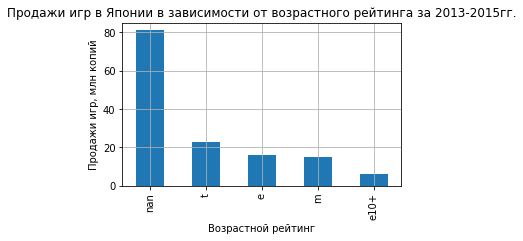

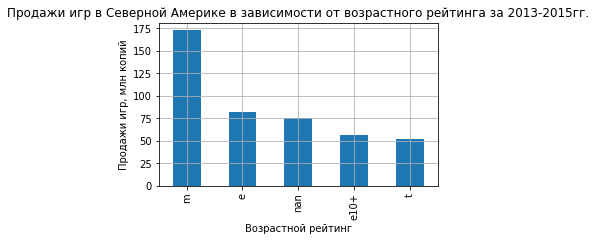

In [41]:
actual_data_rating = actual_data.pivot_table(index='rating', values=('na_sales', 'eu_sales', 'jp_sales', 'other_sales'), aggfunc='sum')
display(actual_data_rating)
actual_data_rating['eu_sales'].sort_values(ascending=False).plot(y='eu_sales', kind='bar', figsize=(5, 3), grid=True)
plt.xlabel('Возрастной рейтинг')
plt.ylabel('Продажи игр, млн копий')
plt.title("Продажи игр в Европе в зависимости от возрастного рейтинга за 2013-2015гг.")
plt.show()

actual_data_rating['jp_sales'].sort_values(ascending=False).plot(y='jp_sales', kind='bar', figsize=(5, 3), grid=True)
plt.xlabel('Возрастной рейтинг')
plt.ylabel('Продажи игр, млн копий')
plt.title("Продажи игр в Японии в зависимости от возрастного рейтинга за 2013-2015гг.")
plt.show()

actual_data_rating['na_sales'].sort_values(ascending=False).plot(y='na_sales', kind='bar', figsize=(5, 3), grid=True)
plt.xlabel('Возрастной рейтинг')
plt.ylabel('Продажи игр, млн копий')
plt.title("Продажи игр в Северной Америке в зависимости от возрастного рейтинга за 2013-2015гг.")
plt.show()


**Для Европы и Северной Америки популярность игр распределилась по рейтингам следующим образом: Для врослых, Для всех, Без рейтинга, Для всех от 10 лет и старше и Для подростков. Для Японии популярность игр распределилась по рейтингам следующим образом: Без рейтинга, Для подростков, Для всех, Для врослых и Для всех от 10 лет и старше. Большое количество игр в Японии без рейтинга ESRB связано с тем, что ESRB это организация, которая определяет рейтинги компьютерных игр в США и Канаде. в Японии рейтинги играм присуждает организация CERO.**

**Составление портрета пользователя каждого региона:**

- В Европе наиболее популярными платформами являются 'PS4' (36,0%), 'PS3' (17,3%), 'XOne' (13,2%), 'X360' (10,8%) и '3DS' (7,9%). В Японии наиболее популярными платформами являются '3DS' (48,2%), 'PS3' (16,6%), 'PSV' (13,2%), 'PS4' (11,3%) и 'WiiU' (7,7%). В Северной Америке наиболее популярными платформами являются 'PS4' (24,8%), 'X360' (18,7%), 'XOne' (21,3%), 'PS3' (14,5%) и '3DS' (8,7%).

- В Европе наиболее популярными жанрами являются Action, Shooter, Sports, Role-Playing, Racing. В Японии наиболее популярными жанрами являются Role-Playing, Action, Misc, Fightning, Shooter. В Северной Америке наиболее популярными жанрами являются Action, Shooter, Sports, Role-Playing, Misc. Точно так же как и в Европе, что вероятно связано с культурными аспектами данных континентов.

- Для Европы и Северной Америки популярность игр распределилась по рейтингам следующим образом: Для врослых, Для всех, Без рейтинга, Для всех от 10 лет и старше и Для подростков. Для Японии популярность игр распределилась по рейтингам следующим образом: Без рейтинга, Для подростков, Для всех, Для врослых и Для всех от 10 лет и старше. Большое количество игр в Японии без рейтинга ESRB связано с тем, что ESRB это организация, которая определяет рейтинги компьютерных игр в США и Канаде. в Японии рейтинги играм присуждает организация CERO.

#### Шаг 5. Проверка гипотез

**5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

- Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

- Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [44]:
xbox_one = actual_data.query('platform == "xone"')
pc = actual_data.query('platform == "pc"')

alpha = 0.05
results = st.ttest_ind(xbox_one['user_score'], pc['user_score'], nan_policy='omit', alternative='two-sided')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 
    
print('Средний пользовательский рейтинг для XOne', xbox_one['user_score'].mean())
print('Средний пользовательский рейтинг для PC', pc['user_score'].mean())


p-значение: 0.14012658403611503
Не отвергаем нулевую гипотезу
Средний пользовательский рейтинг для XOne 6.521428571428572
Средний пользовательский рейтинг для PC 6.269677419354839


**Нулевая гипотеза не отвергнута. Средние пользовательские рейтинги платформ Xbox One и PC одинаковы**

**5.2. Средние пользовательские рейтинги жанров Action и Sports разные.**

- Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковы.

- Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports не равны.

In [45]:
action = actual_data.query('genre == "action"')
sports = actual_data.query('genre == "sports"')

alpha = 0.05
results = st.ttest_ind(action['user_score'], sports['user_score'], nan_policy='omit', alternative='two-sided')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 
    
print('Средний пользовательский рейтинг жанра Action', action['user_score'].mean())
print('Средний пользовательский рейтинг жанра Sports', sports['user_score'].mean())


p-значение: 1.0517832389139422e-27
Отвергаем нулевую гипотезу
Средний пользовательский рейтинг жанра Action 6.837532133676093
Средний пользовательский рейтинг жанра Sports 5.238124999999999


**Нулевая гипотеза отвергнута. Средние пользовательские рейтинги жанров Action и Sports значимо различны.**

**Проверка гипотез:**
- Нулевая гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC не отвергнута. Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.
- Нулевая гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports отвергнута. Средние пользовательские рейтинги жанров Action и Sports значимо различны.

**Нулевые гипотезы формулировались исходя из равенства средних значений генеральных совокупностей, альтернативная исходя из ихнеравенства. Для проверки гипотезы о равенстве средних двух генеральных совокупностей применен метод scipy.stats.ttest_ind(), так как генеральные совокупности не зависят друг от друга. При этом проверялась двусторонняя гипотеза. Пропущенные значения игнорировались. Выбран уровень статистической значимости равным 0,05, рассчитана вероятность p-value и сравнена с уровнем статистической значимости. При p-value меньше уровня статистической значимости нулевая гипотеза отвергалась и принималась альтернативная.**

# Общий вывод:

**Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation):**

- В датафрейме 16715 строк с данными об компьютерных играх, пропущенные значения есть в столбцах 'Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score', 'Rating'.
- Всего 11560 уникальных названий игр в 13 жанрах и в 8-ми возрастных группах.
- Данные по играм представлены с 1980 по 2016 гг для 31 платформы.
- Они оценивались по 8 рейтингам.

**В результате предобработки данных выполнено следующее:**
 - Заменены названия столбцов (приведены к нижнему регистру).
 - Удалены строки где есть пустые значения в столбцах 'name', 'year_of_release', 'genre', так как их незначительное количество.
 - Переведен тип данных в столбце 'year_of_release' в 'int'.
 - В столбце 'user_score' есть значение 'tbd', которое, скорее всего, обозначает To Be Determined (будет определено), оно заменено на значение NaN, a тип данных переведен во float.
 - Выявлен и удален дубликат по столбцам 'name', 'platform', 'year_of_release'.
 - Видно, что есть игры, у которых на определенных платформах нет возрастного ограничения. Очевидно, что на всех платформах будет одинаковое возрастное ограничение. Заполнены пропущенные значения в столбце 'rating' по одной и той же игре с той платформы, где рейтинг есть. Остальные пропуски заменены на слово 'nan', чтобы в дальнейшем было удобно визуализировать данные.
 - Возрастное ограничение 'K-A' (Kids to Adults) это тоже самое, что и 'E' (Everyone), поэтому 'K-A' (Kids to Adults) заменено на 'E' (Everyone). Также заменено 'A-O' (Adults Only 18+) на похожее 'M' (Mature), а 'RP' (Rating Pending), на 'NAN'.
 - Подсчитаны суммарные продажи во всех регионах и записаны в отдельный столбец 'total_sales'.
 
**Проведен исследовательский анализ данных:**

- До 2008-2009 гг. количество выпущенных новых игр росло, далее произошло значительное падение до 2013 года и дальше выпуск игр стабилизировался. Вероятно данные до стабилизации (до 2013 года) будут не актуальны для анализа.
- Явно выделяется топ-6 платформ по количеству продаж: 'PS2', 'X360', 'PS3', 'Wii', 'DS' и 'PS', у которых сумарные продажи изменяются, от 728 до 1234 млн. копий игр. Можно сказать, что характерный срок "жизни" платформы составляет в среднем 10 лет.
- Актуальным периодом будем считать 4 года с 2013 по 2016 гг. Данные за предыдущие года учитывать не будем.
- Лидирующие платформы по общим продажам следующие: 'PS4', 'PS3', 'X360', 'XOne', '3DS'. С 2013 по 2016 гг. продажи игр для платформ 'PS4' и 'XOne' в среднем растут (за 2016 год данные не полные), для платформ 'PS3', 'X360' и '3DS' - падают. Наиболее потенциально прибыльными являются 'PS4' и 'XOne'.
- При рассмотрении диаграмм размаха выявлено достаточно много выбросов в продажах игр почти для каждой платформы. Расперделения значений похоже на распределение Пуассона. Медианы количества продаж игр по платформам варьируются примерно от 0,01 до 0,25 млн. копий.
- В результате построения диаграмм рассеяния корреляции между количеством проданных копий игр и оценками критиков и пользователей являются слабыми для платформы 'PS4', однако оценка критиков оказывает большее влияние на продажи игр, когда оценка пользователей практически не влияет на них.
- Коэффициенты корреляции зависимостей продаж игр от отзывов критиков для платформ 'PS4' и 'XONE' одинаковы, у остальных платформ коэффициенты корреляции меньше. Коэффициенты корреляции зависимостей продаж игр от пользователей для платформ 'PS4' и остальных незначительные, кроме коэффициента корреляции для платформы '3DS', который равен 0.24. В целом для прогнозирования продаж игр популярных платформ можно учитывать влияние оценки критиков на продажи, а оценки пользователей можно не брать во внимание.
- Наибольшее количество игр и суммарное количество продаж в жанре Action. Наименьшее количество игр и суммарное количество продаж в жанре Puzzle. Наибольшее среднее и медианное количество продаж игр жанра Shooter. Наименьшее среднее и медианное количество продаж игр жанра Adventure. В результате, наиболее прибыльным жанром является 'Shooter', наи менее прибыльным - Adventure.

**Составлен портрет пользователя каждого региона:**

- В Европе наиболее популярными платформами являются 'PS4' (36,0%), 'PS3' (17,3%), 'XOne' (13,2%), 'X360' (10,8%) и '3DS' (7,9%). В Японии наиболее популярными платформами являются '3DS' (48,2%), 'PS3' (16,6%), 'PSV' (13,2%), 'PS4' (11,3%) и 'WiiU' (7,7%). В Северной Америке наиболее популярными платформами являются 'PS4' (24,8%), 'X360' (18,7%), 'XOne' (21,3%), 'PS3' (14,5%) и '3DS' (8,7%).

- В Европе наиболее популярными жанрами являются Action, Shooter, Sports, Role-Playing, Racing. В Японии наиболее популярными жанрами являются Role-Playing, Action, Misc, Fightning, Shooter. В Северной Америке наиболее популярными жанрами являются Action, Shooter, Sports, Role-Playing, Misc. Точно так же как и в Европе, что вероятно связано с культурными аспектами данных континентов.

- Для Европы и Северной Америки популярность игр распределилась по рейтингам следующим образом: Для врослых, Для всех, Без рейтинга, Для всех от 10 лет и старше и Для подростков. Для Японии популярность игр распределилась по рейтингам следующим образом: Без рейтинга, Для подростков, Для всех, Для врослых и Для всех от 10 лет и старше. Большое количество игр в Японии без рейтинга ESRB связано с тем, что ESRB это организация, которая определяет рейтинги компьютерных игр в США и Канаде. в Японии рейтинги играм присуждает организация CERO.

**Проверены гипотезы:**
- Нулевая гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC не отвергнута. Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.
- Нулевая гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports отвергнута. Средние пользовательские рейтинги жанров Action и Sports значимо различны.

**На основе выполненного анализа рекомендуется разрабатывать игры под 'PS4' и 'XOne', так как их продажи растут. Также неободимо учитывать отзывы критиков так как они имеют небольшое влияние на количество продаж игр. Игры жанров Action и Shooter являются лидерами по продажам. Значительное влияние на количество продаж имеют платформа, жанр и возрастное ограничение в зависимости от региона, оэтому необходимо это учитывать.**